In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers

In [2]:
'''
earlystoping
callbacks/ model checkpoints -> choose best accuracy , saving model .h5
'''

'\nearlystoping\ncallbacks/ model checkpoints -> choose best accuracy , saving model .h5\n'

In [3]:
kolom = [
'CRIM',
'ZN',
'INDUS',
'CHAS',
'NOX',
'RM',
'AGE',
'DIS',
'RAD',
'TAX',
'PTRATIO',
'B',
'LSTAT',
'MEDV'
]

In [4]:
dataframe = read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data", delim_whitespace=True, header=None)
dataframe.columns = kolom
dataset = dataframe.values

<ipython-input-4-6893e24075aa>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data", delim_whitespace=True, header=None)


In [5]:
dataframe.shape

(506, 14)

In [6]:
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Modeling

In [9]:
network = models.Sequential()
network.add(layers.Dense(24, activation='relu', input_shape=(13,)))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# evaluate model
network.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [11]:
history = network.fit(X_train, y_train, epochs=150, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 2907.3010 - mae: 52.3903 - val_loss: 825.2135 - val_mae: 26.7526
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 674.6850 - mae: 22.5472 - val_loss: 260.8622 - val_mae: 13.6065
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 363.8151 - mae: 15.1542 - val_loss: 440.3748 - val_mae: 15.8362
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 455.7394 - mae: 16.3227 - val_loss: 327.4329 - val_mae: 13.8649
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 315.5123 - mae: 13.6825 - val_loss: 161.3797 - val_mae: 10.4752
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 160.4127 - mae: 9.5768 - val_loss: 132.1102 - val_mae: 9.1491
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 155.1454 - mae: 9.1244 - val_loss: 107.1308 - val_mae: 7.6786
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 107.7020 - mae: 7.1075 - val_loss: 90.4732 - val_mae: 6.9498
Epoch 9/150
6/6 ━━━━━━━━━━━━━━━━━━

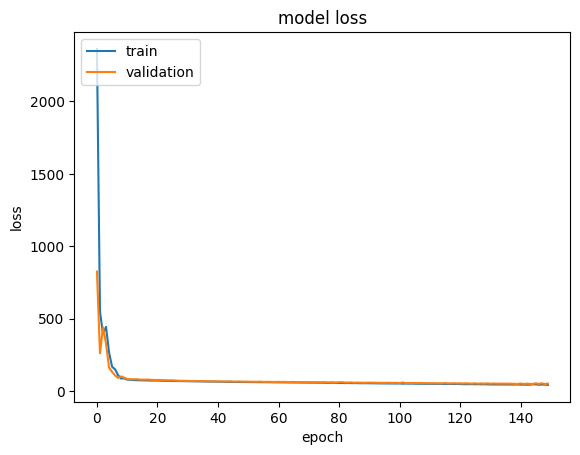

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
Xnew = np.array([[0.006, 25, 5, 0, 1.5, 6.5, 70, 5, 1, 200, 15.3, 396.9, 5]])

ynew = network.predict(Xnew)
print("X=%s \n Predicted=%s" % (Xnew[0], ynew[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
X=[6.000e-03 2.500e+01 5.000e+00 0.000e+00 1.500e+00 6.500e+00 7.000e+01
 5.000e+00 1.000e+00 2.000e+02 1.530e+01 3.969e+02 5.000e+00] 
 Predicted=[34.354893]
